In [1]:
import os
import cv2
import numpy as np
from glob import glob
from scipy.io import loadmat
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model

In [2]:
!gdown https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
!unzip -q instance-level-human-parsing.zip

Downloading...
From: https://drive.google.com/uc?id=1B9A9UCJYMwTL4oBEo4RZfbMZMaZhKJaz
To: /content/instance-level-human-parsing.zip
100% 2.91G/2.91G [00:19<00:00, 146MB/s]


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# IMAGE_SIZE = 224
# BATCH_SIZE = 4
# NUM_CLASSES = 20
# DATA_DIR = "./instance-level_human_parsing/instance-level_human_parsing/Training" #"/content/VOCdevkit"
# NUM_TRAIN_IMAGES = 1000
# NUM_VAL_IMAGES = 50

# train_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[:NUM_TRAIN_IMAGES]
# train_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[:NUM_TRAIN_IMAGES]
# val_images = sorted(glob(os.path.join(DATA_DIR, "Images/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]
# val_masks = sorted(glob(os.path.join(DATA_DIR, "Category_ids/*")))[
#     NUM_TRAIN_IMAGES : NUM_VAL_IMAGES + NUM_TRAIN_IMAGES
# ]



# def read_image(image_path, mask=False):
#     image = tf.io.read_file(image_path)
#     if mask:
#         image = tf.image.decode_png(image, channels=1)
#         image.set_shape([None, None, 1])
#         image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
#     else:
#         image = tf.image.decode_jpeg(image, channels=3)
#         image.set_shape([None, None, 3])
#         image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
#         image = image / 127.5 - 1
#     return image


# def load_data(image_list, mask_list):
#     image = read_image(image_list)
#     mask = read_image(mask_list, mask=True)
#     return image, mask


# def data_generator(image_list, mask_list):
#     dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
#     dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
#     dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
#     return dataset


# train_dataset = data_generator(train_images, train_masks)
# val_dataset = data_generator(val_images, val_masks)

# print("Train Dataset:", train_dataset)
# print("Val Dataset:", val_dataset)


Train Dataset: <BatchDataset shapes: ((4, 224, 224, 3), (4, 224, 224, 1)), types: (tf.float32, tf.float32)>
Val Dataset: <BatchDataset shapes: ((4, 224, 224, 3), (4, 224, 224, 1)), types: (tf.float32, tf.float32)>


In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 4
NUM_CLASSES = 20
DATA_DIR_VOC = "/content/VOCdevkit"
# NUM_TRAIN_IMAGES = 1000
# NUM_VAL_IMAGES = 50


with open('/content/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt') as f:
    train_lines = f.read().splitlines()

train_images = train_lines.copy()
train_masks = train_lines.copy()
for i in range(len(train_lines)):
    train_images[i] = os.path.join('/content/VOCdevkit/VOC2012/JPEGImages', train_lines[i] + '.jpg')
    train_masks[i] = os.path.join('/content/VOCdevkit/VOC2012/SegmentationClass', train_lines[i] + '.png')
print(train_images)
print(train_masks)


NUM_TRAIN_IMAGES = len(train_lines)

with open('/content/VOCdevkit/VOC2012/ImageSets/Segmentation/val.txt') as f:
    val_lines = f.read().splitlines()

val_images = val_lines.copy()
val_masks = val_lines.copy()
for i in range(len(val_lines)):
    val_images[i] = os.path.join('/content/VOCdevkit/VOC2012/JPEGImages', val_lines[i] + '.jpg')
    val_masks[i] = os.path.join('/content/VOCdevkit/VOC2012/SegmentationClass', val_lines[i] + '.png')

NUM_VAL_IMAGES = len(val_lines)

def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 20
    else:
        image = tf.image.decode_jpeg(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
        image = image / 127.5 - 1
    return image


def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask


def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset

train_dataset_VOC = data_generator(train_images, train_masks)
val_dataset_VOC = data_generator(val_images, val_masks)

print("Train Dataset:", train_dataset_VOC)
print("Val Dataset:", val_dataset_VOC)


['/content/VOCdevkit/VOC2012/JPEGImages/2007_000032.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000039.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000063.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000068.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000121.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000170.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000241.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000243.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000250.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000256.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000333.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000363.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000364.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000392.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000480.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000504.jpg', '/content/VOCdevkit/VOC2012/JPEGImages/2007_000515.jpg', '/content/VOCdevkit/VOC2012/JP

In [3]:
count = 0
for img,mask in train_dataset_VOC:
  # print(mask)
  print('Mask mean')
  print(tf.reduce_mean(mask))
  # print('Unique mask values')
  # print(tf.unique(tf.reshape(mask,[-1])))
  print('image mean')
  print(tf.reduce_mean(img))
  print('------------------------------------------')
  count+=1
  if count == 5:
    break

Mask mean
tf.Tensor(0.95759565, shape=(), dtype=float32)
image mean
tf.Tensor(-0.028834391, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(1.4535455, shape=(), dtype=float32)
image mean
tf.Tensor(-0.17289275, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(1.9563212, shape=(), dtype=float32)
image mean
tf.Tensor(-0.09519777, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(2.1365821, shape=(), dtype=float32)
image mean
tf.Tensor(0.021649655, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(0.9223341, shape=(), dtype=float32)
image mean
tf.Tensor(-0.28240398, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(1.1369696, shape=(), dtype=float32)
image mean
tf.Tensor(-0.26627448, shape=(), dtype=float32)
------------------------------------------
Mask mean
tf.Tensor(2.0327353, shape=(), dtype=flo

## Rough model for DeepLabV3


In [5]:
def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    padding="same",
    use_bias=False,):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return tf.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]), interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [ ]:
# def DeeplabV3Plus_1(image_size, num_classes):
#     model_input = keras.Input(shape=(image_size, image_size, 3))
#     resnet50 = keras.applications.ResNet50(
#         weights="imagenet", include_top=False, input_tensor=model_input
#     )
#     resnet50.summary()
#     x = resnet50.get_layer("conv4_block6_2_relu").output
#     print("#########################################################")
#     print(x.shape)
#     x = DilatedSpatialPyramidPooling(x)

#     input_a = layers.UpSampling2D(
#         size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
#         interpolation="bilinear",
#     )(x)
    
#     print(input_a.shape)
#     input_b = resnet50.get_layer("conv2_block3_2_relu").output
#     print("#########################################################")
#     print(input_b.shape)
#     input_b = convolution_block(input_b, num_filters=48, kernel_size=1)
#     print("#########################################################")
#     print(input_b.shape)

#     x = layers.Concatenate(axis=-1)([input_a, input_b])
#     x = convolution_block(x)
#     x = convolution_block(x)
#     x = layers.UpSampling2D(
#         size=(image_size // x.shape[1], image_size // x.shape[2]),
#         interpolation="bilinear",
#     )(x)
#     model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
#     return keras.Model(inputs=model_input, outputs=model_output)


# model = DeeplabV3Plus_1(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
# #model.summary()

In [8]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))

    model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=None, alpha=1.0, include_top=False, weights='imagenet', 
                                            input_tensor=model_input, pooling=None, classes=1000)
    
    #MNetV3.summary()

    x = model.get_layer("block_6_expand_relu").output # 
    print(x.shape)
    x = DilatedSpatialPyramidPooling(x)

    print("x")
    print(x.shape)
    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)

    print("input_a")
    print(input_a.shape)
    input_b = model.get_layer("block_2_add").output  #block_3_expand_relu
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    print("input_b")
    print(input_b.shape)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
model.summary()

(None, 28, 28, 192)
x
(None, 28, 28, 256)
input_a
(None, 56, 56, 256)
input_b
(None, 56, 56, 48)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]               

In [10]:
class CustomSaver(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        PATH = 'drive/MyDrive/PRT-project/DLV3-HumanParsingDS-epoch-%d.h5'%(epoch)
        if epoch == 20:  # or save after some epoch, each k-th epoch etc.
            self.model.save(PATH)


In [12]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    loss=loss,
    metrics=["accuracy"],
)
saver = CustomSaver()
history = model.fit(train_dataset_VOC, validation_data=val_dataset_VOC, callbacks=[saver], epochs=100)

Epoch 1/100
366/366 [==============================] - 31s 77ms/step - loss: 1.0720 - accuracy: 0.6896 - val_loss: 1.2449 - val_accuracy: 0.6879
Epoch 2/100
366/366 [==============================] - 28s 76ms/step - loss: 1.0555 - accuracy: 0.6889 - val_loss: 1.2745 - val_accuracy: 0.6334
Epoch 3/100
366/366 [==============================] - 28s 75ms/step - loss: 1.0434 - accuracy: 0.6874 - val_loss: 1.2381 - val_accuracy: 0.6748
Epoch 4/100
366/366 [==============================] - 27s 75ms/step - loss: 1.0357 - accuracy: 0.6873 - val_loss: 1.1566 - val_accuracy: 0.6798
Epoch 5/100
366/366 [==============================] - 27s 75ms/step - loss: 1.0295 - accuracy: 0.6869 - val_loss: 1.1225 - val_accuracy: 0.6872
Epoch 6/100
366/366 [==============================] - 28s 76ms/step - loss: 1.0222 - accuracy: 0.6869 - val_loss: 1.0771 - val_accuracy: 0.6828
Epoch 7/100
366/366 [==============================] - 27s 75ms/step - loss: 1.0142 - accuracy: 0.6870 - val_loss: 1.0566 - val_ac

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 22/100
366/366 [==============================] - 28s 75ms/step - loss: 0.8816 - accuracy: 0.6780 - val_loss: 1.3045 - val_accuracy: 0.6500
Epoch 23/100
366/366 [==============================] - 27s 75ms/step - loss: 0.8662 - accuracy: 0.6779 - val_loss: 1.1984 - val_accuracy: 0.6814
Epoch 24/100
366/366 [==============================] - 27s 75ms/step - loss: 0.8447 - accuracy: 0.6768 - val_loss: 1.1079 - val_accuracy: 0.6714
Epoch 25/100
366/366 [==============================] - 28s 75ms/step - loss: 0.8292 - accuracy: 0.6756 - val_loss: 1.1998 - val_accuracy: 0.6792
Epoch 26/100
366/366 [==============================] - 28s 76ms/step - loss: 0.8248 - accuracy: 0.6745 - val_loss: 1.5633 - val_accuracy: 0.5030
Epoch 27/100
366/366 [==============================] - 28s 75ms/step - loss: 0.8119 - accuracy: 0.6749 - val_loss: 1.7055 - val_accuracy: 0.4066
Epoch 28/100
366/366 [==============================] - 28s 75ms/step - loss: 0.7901 - accuracy: 0.6745 - val_loss: 2.0579 -

In [ ]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar 

In [ ]:
%%bash
tar -xvf /content/VOCtrainval_11-May-2012.tar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


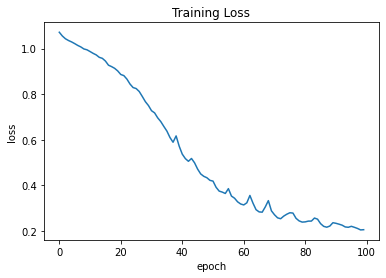

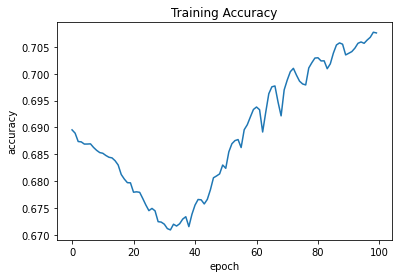

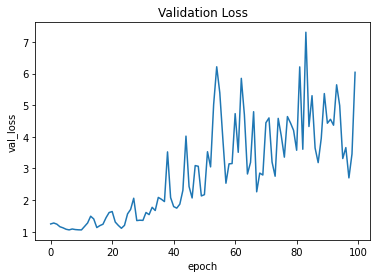

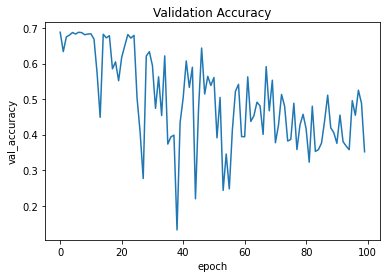

In [13]:
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()

In [ ]:
model.outputs

[<KerasTensor: shape=(None, 512, 512, 20) dtype=float32 (created by layer 'conv2d_9')>]